### Alumno : Rubén Álvarez Mosquera

---

# Proyecto : Detector de Monedas

---

In [130]:
# Declaración de Librerías

# Librería OpenCV para el manejo de imágenes
import cv2
# Librería Skimage para también gestión de imágenes
# En este proyecto principalmente para mostrar las imágenes
import skimage as ski;
# Módulo "pyplot" de la  librería matplotlib 
# En este proyecto principalmente para mostrar las imágenes
import matplotlib.pyplot as plt
# Librería Numpy para procedimientos matemáticós
import numpy as np
# El módulo "interact" de la Librería ipwidgets, para tener sliders interactivos
from ipywidgets import interact
# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings


In [131]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=UserWarning)

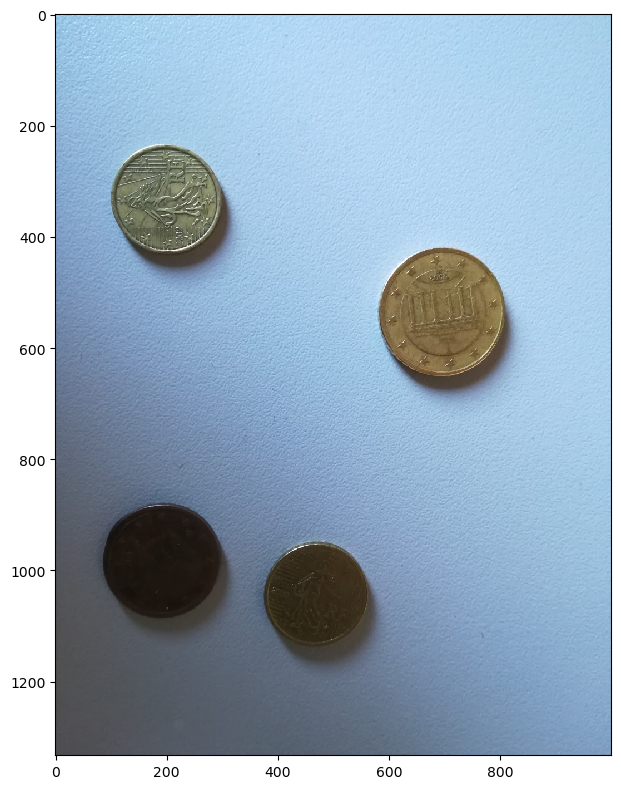

In [132]:
# Cargar imagen desde disco
img = cv2.imread("images/monedas.jpg")
# img = cv2.imread("images/monedas2.jpg")
# img = cv2.imread("images/coins.jpeg")
# img = cv2.imread("images/coins2.jpg")
# img = cv2.imread("images/coins3.jpg")

# Cargar el modo RGB en la imagen, para visualizarla correctamente
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Mostrar la imagen por pantalla
ski.io.imshow(img)

In [133]:
# Creamos slider interactivo
@interact(Resolution=(128, 1024, 1))
# Función que ajusta la resolución interactivamente de 128 a 1024
# conservando la proporción de la imagen
def ajusta_resolution(Resolution):
    global img, image
    d = Resolution / img.shape[1]
    dim = (Resolution, int(img.shape[0] * d))
    image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    # Mostrar la imagen por pantalla
    ski.io.imshow(image)

interactive(children=(IntSlider(value=576, description='Resolution', max=1024, min=128), Output()), _dom_class…

In [134]:
# Creamos una copia para preservar una compia de la imagen escalada original
original = image.copy()


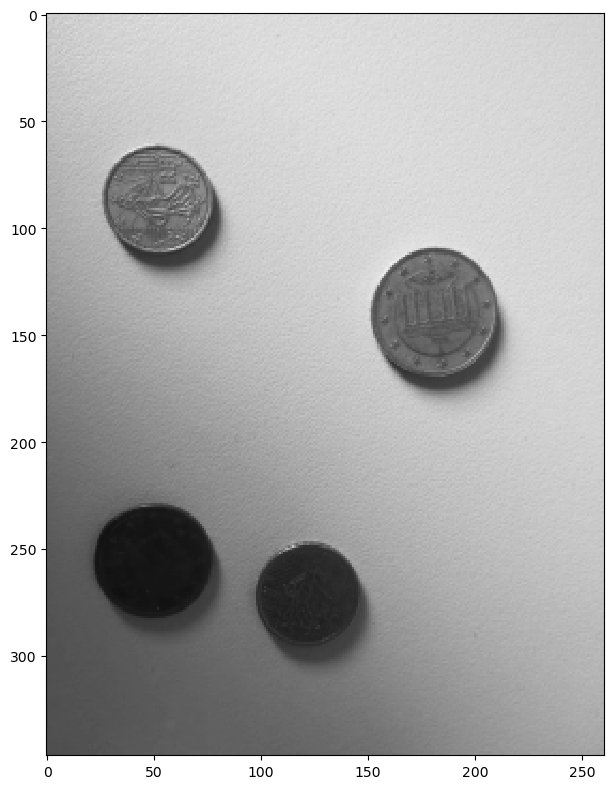

In [135]:
# Convertimos la imagen a escala de grises para facilitar la detección
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Mostrar la imagen por pantalla
ski.io.imshow(gray)


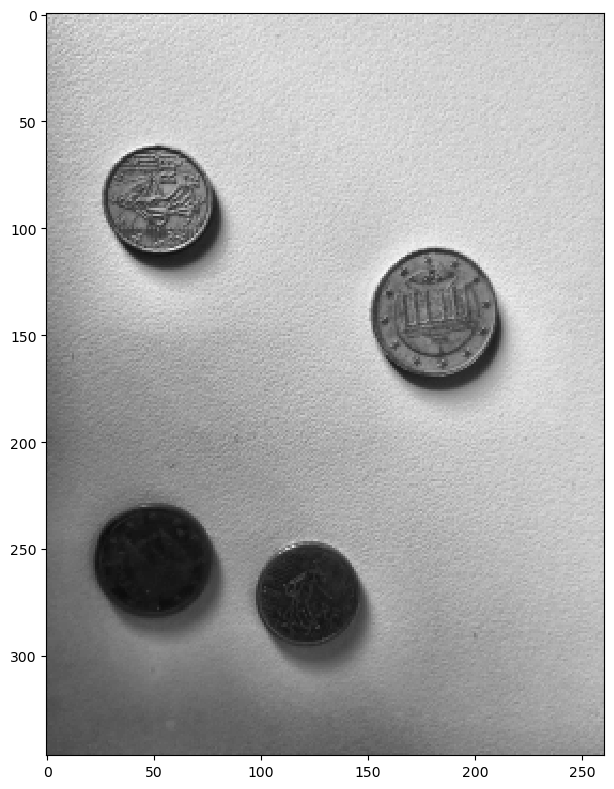

In [136]:
# Clarificamos la imagen a través de un filtro que ensalza el contraste
clarify = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# Aplicamos los parámetros a la imagen
gray = clarify.apply(gray)
# Mostrar la imagen por pantalla
ski.io.imshow(gray)

In [137]:
# Creamos slider interactivo
@interact(Gauss=(1, 100, 2))
# Función que ajusta el filtro Gaussiano
def ajusta_gauss(Gauss):
    global gauss
    # Aplica filtro gausiano
    gauss = cv2.GaussianBlur(gray, (Gauss,Gauss), 0)
    # Mostrar la imagen por pantalla
    ski.io.imshow(gauss)

interactive(children=(IntSlider(value=49, description='Gauss', min=1, step=2), Output()), _dom_classes=('widge…

In [138]:
# Detectamos los bordes con Canny con slider interactivo para ajustar
# y detectamos las monedas que cuenta, para ajustarlo a la realidad
@interact(CannyFilter_A=(0, 100),CannyFilter_B=(0, 100))
# Función que ajusta el contorno y detecta monedas
def ajusta_contorno(CannyFilter_A,CannyFilter_B):
    global canny, output
    
    # Creamos una copia para mostrar los resultados finales, respecto a la original
    output = original.copy()

    # aplica filtro Canny
    canny = cv2.Canny(gauss,threshold1=CannyFilter_A, threshold2=CannyFilter_B)

    # Intentamos reconocer cuantos circulos hay
    # Previendo malfuncionamientos por llamadas aNumpy con registros vacios o nulos
    try:
        # A travéws de esta función intentaremos reconocer los circulos
        # Para posteriormentepintarlos con la info x/y/radio
        circles = cv2.HoughCircles(
                canny,  # imagen de entrada a la funcion
                cv2.HOUGH_GRADIENT,  # tipo de detección
                1,  # parametro del ratio inverso de la resolución de la imagen dada
                40,  # distancia mínima entre los centros de los círculos
                param1=50,  # Valor del gradiente pasado por el detector de bordes
                param2=30,  # Acumulador de límite para los centros de los círculos
                minRadius=0,  # mínimo radio para los círculos
                maxRadius=0  # máximo radio para los círculos
            )
        # Redondea los valores de las coordenadas x/y/radio
        circles = np.uint16(np.around(circles))

        # Para cada círculo encontrado...
        for i in circles[0,:]:
            # Dibuja el círculo exterios con el radio
            cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
            # Dibuja el punto central del círculo
            cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        # Muestra en pantalla el número de círculos encontrados
        print(f'Detectadas {len(circles[0])} monedas.')
    except:
        pass

    
    # Aplicamos un cambio en las dimensiones de las imagenes para que
    # salgan correctamente representadas en pantalla
    canny_reshaped = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
    gauss_reshaped = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
    # Designamos el tamaño de las imágenes de salida
    plt.rcParams["figure.figsize"] = [8, 8]
    # Configuramos la figura 1
    plt.subplot(2, 2, 1)
    plt.axis('off')
    plt.title('Salida de Resolución')
    plt.imshow(image)
    # Configuramos la figura 2
    plt.subplot(2, 2, 2)
    plt.axis('off')
    plt.title('Salida de Filtro Gauss + Contraste')
    plt.imshow(gauss_reshaped)
    # Configuramos la figura 3
    plt.subplot(2, 2, 3)
    plt.axis('off')
    plt.title('Salida filtro Canny de bordes')
    plt.imshow(canny_reshaped)
    # Configuramos la figura 4
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.title('Imagen con las monedas detectadas')
    plt.imshow(output)
    # Mostramos la matriz de figuras
    plt.show()



interactive(children=(IntSlider(value=50, description='CannyFilter_A'), IntSlider(value=50, description='Canny…

---
---
---

## EXTRA: Ponemos todas las transformaciones en un único paso

---

In [139]:
import cv2
import skimage as ski;
import numpy as np
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

img = cv2.imread("images/monedas.jpg")
# img = cv2.imread("images/monedas2.jpg")
# img = cv2.imread("images/coins.jpeg")
# img = cv2.imread("images/coins2.jpg")
# img = cv2.imread("images/coins3.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

@interact(Resolution=(128, 1024, 1),Gauss=(1, 100, 2),CannyFilter_A=(0, 100),CannyFilter_B=(0, 100))
# Función que ajusta la resolución interactivamente de 256 a 1024
# conservando la proporción de la imagen
def ajusta_deteccion(Resolution,Gauss,CannyFilter_A,CannyFilter_B):
    global img, image, gauss, canny, output
    d = Resolution / img.shape[1]
    dim = (Resolution, int(img.shape[0] * d))
    image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    # Mostrar la imagen por pantalla
    ski.io.imshow(image)
    # Creamos una copia para preservar una compia de la imagen escalada original
    original = image.copy()
    # Convertimos la imagen a escala de grises para facilitar la detección
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Clarificamos la imagen a través de un filtro que ensalza el contraste
    clarify = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Aplicamos los parámetros a la imagen
    gray = clarify.apply(gray)
    gauss = cv2.GaussianBlur(gray, (Gauss,Gauss), 0)
    # Creamos una copia para mostrar los resultados finales, respecto a la original
    output = original.copy()
    # aplica filtro Canny
    canny = cv2.Canny(gauss,threshold1=CannyFilter_A, threshold2=CannyFilter_B)
    
    # Intentamos reconocer cuantos circulos hay
    # Previendo malfuncionamientos por llamadas aNumpy con registros vacios o nulos
    try:
        # A travéws de esta función intentaremos reconocer los circulos
        # Para posteriormentepintarlos con la info x/y/radio
        circles = cv2.HoughCircles(
                canny,  # imagen de entrada a la funcion
                cv2.HOUGH_GRADIENT,  # tipo de detección
                1,  # parametro del ratio inverso de la resolución de la imagen dada
                40,  # distancia mínima entre los centros de los círculos
                param1=50,  # Valor del gradiente pasado por el detector de bordes
                param2=30,  # Acumulador de límite para los centros de los círculos
                minRadius=0,  # mínimo radio para los círculos
                maxRadius=0  # máximo radio para los círculos
            )
        # Redondea los valores de las coordenadas x/y/radio
        circles = np.uint16(np.around(circles))

        # Para cada círculo encontrado...
        for i in circles[0,:]:
            # Dibuja el círculo exterios con el radio
            cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
            # Dibuja el punto central del círculo
            cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        # Muestra en pantalla el número de círculos encontrados
        print(f'Detectadas {len(circles[0])} monedas.')
    except:
        pass
    
    # Aplicamos un cambio en las dimensiones de las imagenes para que
    # salgan correctamente representadas en pantalla
    canny_reshaped = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
    gauss_reshaped = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
    # Designamos el tamaño de las imágenes de salida
    plt.rcParams["figure.figsize"] = [8, 8]
    # Configuramos la figura 1
    plt.subplot(2, 2, 1)
    plt.axis('off')
    plt.title('Salida de Resolución')
    plt.imshow(image)
    # Configuramos la figura 2
    plt.subplot(2, 2, 2)
    plt.axis('off')
    plt.title('Salida de Filtro Gauss + Contraste')
    plt.imshow(gauss_reshaped)
    # Configuramos la figura 3
    plt.subplot(2, 2, 3)
    plt.axis('off')
    plt.title('Salida filtro Canny de bordes')
    plt.imshow(canny_reshaped)
    # Configuramos la figura 4
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.title('Imagen con las monedas detectadas')
    plt.imshow(output)
    # Mostramos la matriz de figuras
    plt.show()

interactive(children=(IntSlider(value=576, description='Resolution', max=1024, min=128), IntSlider(value=49, d…